In [ ]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load CIFAR-100 dataset (normalized and one-hot encoded)
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 100)  # One-hot encode labels for 100 classes
y_test = to_categorical(y_test, 100)

169001437/169001437 [==============================] - 2s 0us/step


In [ ]:
print('Train Images Shape:      ', X_train.shape)
print('Train Labels Shape:      ', y_train.shape)

print('\nValidation Images Shape: ', X_valid.shape)
print('Validation Labels Shape: ', y_valid.shape)

print('\nTest Images Shape:       ', X_test.shape)
print('Test Labels Shape:       ', y_test.shape)

Train Images Shape:       (50000, 32, 32, 3)
Train Labels Shape:       (50000, 1)

Validation Images Shape:  (10000, 32, 32, 3)
Validation Labels Shape:  (10000, 100)

Test Images Shape:        (10000, 32, 32, 3)
Test Labels Shape:        (10000, 100, 100)


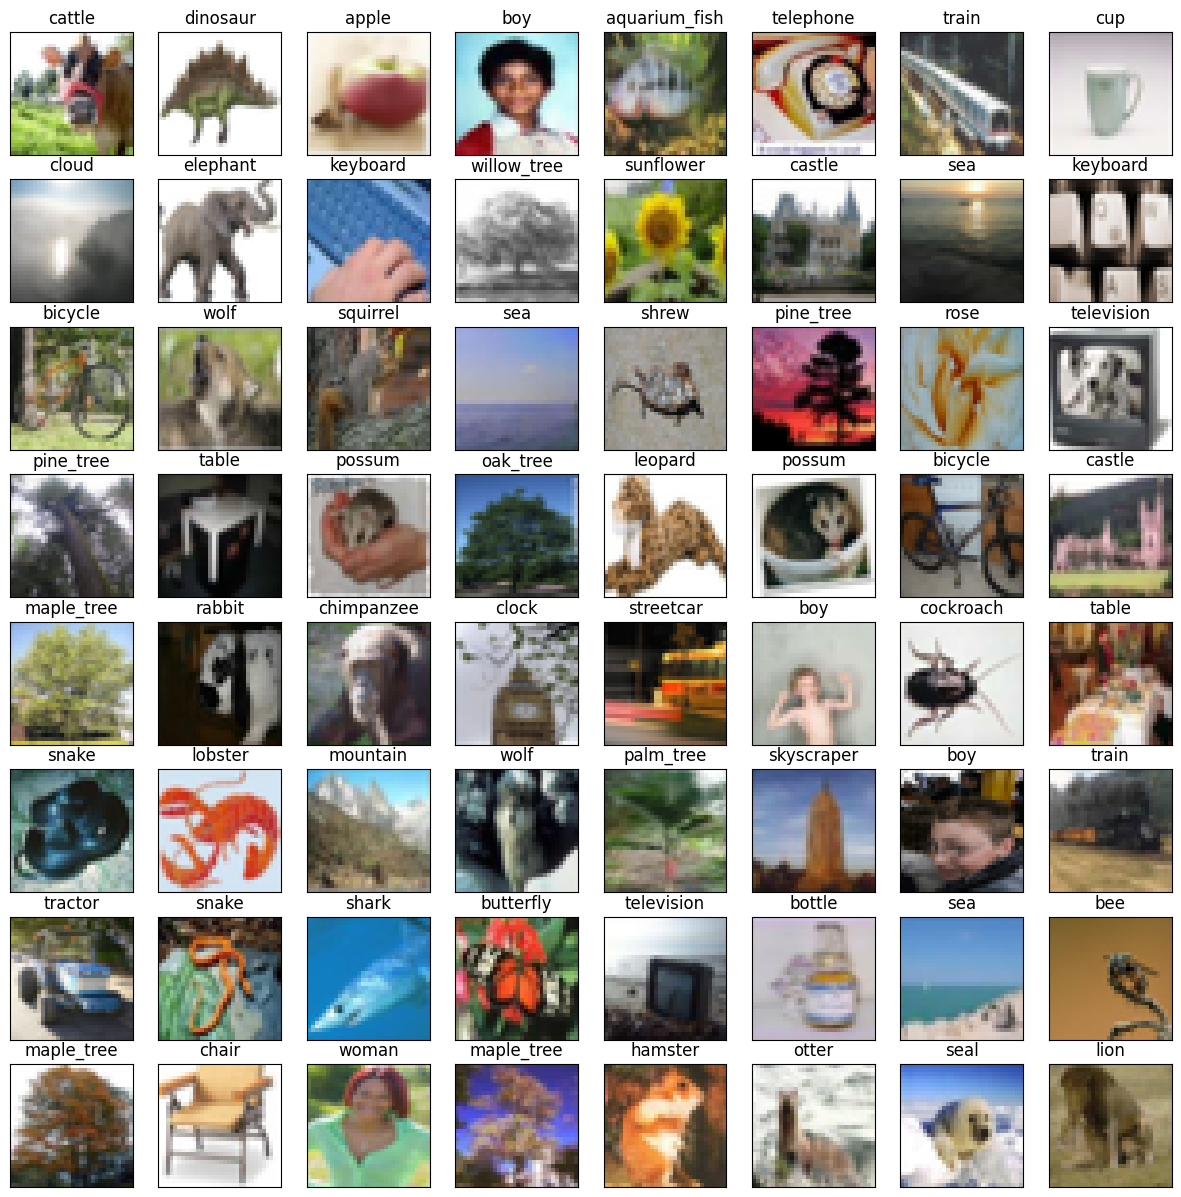

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100

# Load CIFAR-100 dataset
(X_train, y_train), (_, _) = cifar100.load_data(label_mode='fine')

# CIFAR-100 classes
class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
               'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
               'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
               'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
               'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
               'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
               'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
               'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar',
               'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
               'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# Create a new figure
plt.figure(figsize=(15,15))

# Loop over the first 64 images
for i in range(64):
    # Create a subplot for each image
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(X_train[i])

    # Set the label as the title
    plt.title(class_names[y_train[i][0]], fontsize=12)

# Display the figure
plt.show()


In [ ]:
# Data augmentation (optional but recommended)
datagen = ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
datagen.fit(X_train)


In [ ]:
# Define CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(X_train.shape[1:])))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='softmax'))

In [ ]:
#complile model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model with data augmentation
model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 104s 64ms/step - loss: 3.8099 - accuracy: 0.1207 - val_loss: 3.2542 - val_accuracy: 0.2104
Epoch 2/10
1563/1563 [==============================] - 97s 62ms/step - loss: 3.1526 - accuracy: 0.2281 - val_loss: 2.8887 - val_accuracy: 0.2799
Epoch 3/10
1563/1563 [==============================] - 96s 62ms/step - loss: 2.8688 - accuracy: 0.2828 - val_loss: 2.7634 - val_accuracy: 0.3018
Epoch 4/10
1563/1563 [==============================] - 101s 64ms/step - loss: 2.7023 - accuracy: 0.3186 - val_loss: 2.5948 - val_accuracy: 0.3371
Epoch 5/10
1563/1563 [==============================] - 101s 64ms/step - loss: 2.5817 - accuracy: 0.3411 - val_loss: 2.5764 - val_accuracy: 0.3494
Epoch 6/10
1563/1563 [==============================] - 101s 64ms/step - loss: 2.4937 - accuracy: 0.3597 - val_loss: 2.5314 - val_accuracy: 0.3567
Epoch 7/10
1563/1563 [==============================] - 100s 64ms/step - loss: 2.4239 - accuracy: 0.3746 - val_loss: 2.4

In [ ]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 2.4763 - accuracy: 0.3739
Test accuracy: 0.37389999628067017


In [ ]:
predictions = model.predict(X_test)

313/313 [==============================] - 5s 17ms/step
